# Perceptron의 기본

출처: [EXCELSIOR:티스토리](https://excelsior-cjh.tistory.com/169?category=940400) 

## 퍼셉트론이란?

- 퍼셉트론은 프랑크 로젠블라트(Fank Rosenblatt)가 1957년에 고안안 알고리즘이다.

- 퍼셉트론이 바로 신경망(딥러닝)의 기원이 되는 알고리즘이다.

- 퍼셉트론은 다수의 신호(흐름이 있는)를 입력으로 받아 하나의 신호를 출력한다.

- 퍼셉트론은 이 신호를 입력으로 받아 '흐른다/안 흐른다'(1 또는 0)이라는 정보를 앞으로 전달한다.

	![perceptron](https://github.com/ElaYJ/supplement/assets/153154981/cd507e70-49c0-4ff6-9feb-1ba6b8f11ba5)

- $x_1$​과 $x_2$​는 입력 신호, ​$y$는 출력 신호, $w_1$​과 $w_2$​는 가중치(weight)를 의미한다.

- 원을 뉴런 또는 노드라고 부른다.

- 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해진다. $~\dashrightarrow~ w_1x_1, w_2x_2$

- 뉴런에서 전달 받은 신호의 총합이 임계값 $\theta$​를 넘을 때만 $1$​을 출력한다.

- 이것을 수식으로 나타내면 아래와 같다.

	$~~~
		y = \begin{cases}
				~0 &(w_1x_1 + w_2x_2 \leq \theta) \\
				~1 &(w_1x_1 + w_2x_2 > \theta)
			\end{cases}
	$

- 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여한다.

- **가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소**로 작용하며, 가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻한다.

- 편향(bias)을 도입하면 수식은 다음과 같다.

	$~~~
		y = \begin{cases}
				~0 &(w_1x_1 + w_2x_2 + b \leq 0) \\
				~1 &(w_1x_1 + w_2x_2 + b > 1)
			\end{cases}
	$

- 편향이라는 용어는 ‘한쪽으로 치우쳐 균형을 깬다’라는 의미를 담고 있다.

- 실제로 위의 식에서 두 입력$(x_1,~x_2​)$이 모두 0이어도 결과로 (0이 아닌) 편향 값을 출력한다.

## 단순 논리 회로

AND, NAND, OR 각 게이트의 진리표들을 보면, 퍼셉트론 구조는 모두 동일하며 다른것은 매개변수(​)의 값뿐이다. <br>따라서, 매개변수$(w_1,~w_2,~\theta)$의 값만 적절히 조정하면 AND, NAND, OR을 구현할 수 있다! <br>신경망 학습은 이 매개변수의 값을 정하는 작업을 컴퓨터가 자동으로 하도록 하는 것이다. 

**학습**이란 적절한 매개변수 값을 정하는 작업이며, <br>이를 위해 퍼셉트론의 구조(모델)를 고민하고 컴퓨터에 학습할 데이터를 주어야 한다.

In [1]:
import numpy as np

### - AND 게이트

- `AND Gate`의 진리표

	![ANDgate](https://github.com/ElaYJ/supplement/assets/153154981/37ba5f5a-ab59-430c-9b0b-ddbba9257590)

- AND 게이트를 퍼셉트론으로 표현하기 위해서는 ​$~w_1,~w_2,~\theta \,$의 값을 적절하게 정해야 한다.

- ​$(\,w_1,~w_2,~\theta \,) = (0.5,~0.5,~0,7)$ 일 때, AND 게이트의 조건을 만족한다.

In [4]:
def AND_basic(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    z = x1*w1 + x2*w2
    if z <= theta:
        return 0
    elif z > theta:
        return 1

In [5]:
inputs = [
	(0, 0),
	(1, 0),
	(0, 1),
	(1, 1)
]
for x1, x2 in inputs:
    y = AND_basic(x1, x2)
    print("({x1}, {x2}) -> {y}".format(x1=x1, x2=x2, y=y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [6]:
def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    z = np.sum(w*x) + b
    if z <= 0:
        return 0
    else: return 1

In [8]:
print("AND:")
for x1, x2 in inputs:
    y = AND(x1, x2)
    print("({x1}, {x2}) -> {y}".format(x1=x1, x2=x2, y=y))

AND:
(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


### - NAND 게이트

- `NAND Gate`의 진리표

	![NNADgate](https://github.com/ElaYJ/supplement/assets/153154981/36052710-8988-4fff-93c0-21916f3a4d57)

- NAND 게이트는 Not AND를 의미하며 AND 게이트의 출력을 반대로한 것과 같다.

- ​$(\,w_1,~w_2,~\theta \,) = (-0.5,~-0.5,~-0,7)$ 일 때, NAND 게이트의 조건을 만족한다.

In [9]:
def NAND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    z = np.sum(w*x) + b
    if z <= 0:
        return 0
    else: return 1

In [10]:
print("NAND:")
for x1, x2 in inputs:
    y = NAND(x1, x2)
    print("({x1}, {x2}) -> {y}".format(x1=x1, x2=x2, y=y))

NAND:
(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


### - OR 게이트

- `OR Gate`의 진리표

	![ORgate](https://github.com/ElaYJ/supplement/assets/153154981/6bca0e5d-0695-4dce-b517-ae11e5c36e86)

- OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로다.

- ​$(\,w_1,~w_2,~\theta \,) = (0.5,~0.5,~0,2)$ 일 때, OR 게이트의 조건을 만족한다.

In [11]:
def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    z = np.sum(w*x) + b
    if z <= 0:
        return 0
    else: return 1

In [12]:
print("OR:")
for x1, x2 in inputs:
    y = OR(x1, x2)
    print("({x1}, {x2}) -> {y}".format(x1=x1, x2=x2, y=y))

OR:
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


## 퍼셉트론의 한계

1969년 Marvin Minsky와 Seymour Papert는 '퍼셉트론'이란 논문에서 퍼셉트론의 심각한 약점이 있다는 것을 보였는데, 그 중에서도 가장 결정적인 것은 선형결합인 퍼셉트론이 배타적 논리합인 XOR 분류 문제를 해결할 수 없다는 것이었다. 


### - XOR 게이트

- `XOR Gate`의 진리표

	![XORgate](https://github.com/ElaYJ/supplement/assets/153154981/8bae9090-0a4a-4d69-b380-aeb2aef1191f)

- 단층 퍼셉트론으로 AND, NAND, OR 게이트는 구현 가능하지만, XOR 게이트는 구현할 수 없다.

- 단일 퍼셉트론은 선형함수이므로 직선으로만 두 영역을 나눌 수 있다. 하지만 XOR은 직선으로 두 영역을 나눌 수 없다.

	![XORproblem](https://github.com/ElaYJ/supplement/assets/153154981/f40763e0-f58c-4913-932a-03d4b48e646f)

- 만약 선형이라는 제약을 없앤다면 비선형으로 영역을 나눌 수 있다.

	![XORsperation](https://github.com/ElaYJ/supplement/assets/153154981/aeed9480-53e6-4537-becf-d481acaacba0)

## 다층 퍼셉트론

단층 퍼셉트론으로는 XOR을 구현할 수 없지만, 다층 퍼센트론(multi-layer perceptron)으로 XOR 게이트를 구현할 수 있다.

### - 기존 게이트 조합

- 입력값 $x_1,~x_2\,$​를 각각 NAND와 OR 게이트에 보낸 다음, 그 결과 값들을 AND 게이트에 보내면 XOR 게이트를 구현할 수 있다.

	![XOR_1](https://github.com/ElaYJ/supplement/assets/153154981/fb564bc1-7a43-4ef2-8fbc-7c34684ca4c5)
	
	![XOR_2](https://github.com/ElaYJ/supplement/assets/153154981/6939c5ab-add7-4976-943e-ab48d25445ee)

In [15]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [16]:
print("XOR:")
for x1, x2 in inputs:
    y = XOR(x1, x2)
    print("({x1}, {x2}) -> {y}".format(x1=x1, x2=x2, y=y))

XOR:
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# Perceptron의 개념

출처: [EXCELSIOR:티스토리](https://excelsior-cjh.tistory.com/172?category=940400) 

### 퍼셉트로 구조

- 퍼셉트론(Perceptron)은 Frank Rosenblatt가 1975년에 제안한 인공 신경망 구조 중 하나이다.

	이 퍼셉트론이 바로 신경망(딥러닝)의 기원이 되는 알고리즘이라고 할 수 있다.

- 퍼셉트론은 **TLU**(Threshold Logic Unit)이라는 형태의 뉴런을 기반으로 하며, 

	입력과 출력이 어떤 숫자이고 입력마다 각각의 고유한 **가중치**($\bold W$, weight)가 곱해진다.

	$~~~ z = w_1x_1 + w_2x_2 +~\cdots~+ w_nx_n = \bold{W^T \cdot X}$

	그런 다음 계산된 합 $z\,$에 **계단 함수**(step function)를 적용하여 결과 $h\,$를 출력한다.

	![perceptron_1](https://github.com/ElaYJ/supplement/assets/153154981/23bd5712-d2db-4158-89ff-f9df3982087f)

- 퍼셉트론에서 가장 널리 사용되는 계단 함수는 _헤비사이드 계단 함수_(Heaviside step function)이며, 

	단위 계단 함수(unit step function)라고도 한다. 

	간혹 계단 함수 대신 _부호 함수_(sign function)을 사용하기도 한다.

	$
		\text{heaviside}(z) = \begin{cases}
				~0~ &(z < 0) \\
				~1~ &(z \geq 0)
			\end{cases},~~~
		\text{sign}(z) = \begin{cases}
				~-1 &(z < 0) \\
				~~0 &(z = 0) \\
				~+1 &(z > 0)
			\end{cases}
	$

- 하나의 TLU는 입력과 가중치의 선형결합인 $z\,$가 $z \geq 0$ 이면 양성 클래스, $z < 0~$이면 음성 클래스를 출력하게 하는 **선형 이진 분류**(linear binary classification)에 적용할 수 있다. 

- 이러한 TLU를 학습시킨다는 것은 분류를 잘 할 수 있는 최적의 매개변수 $w_1,~w_2,\cdots,~w_n\,$을 찾는다는 뜻이다.

- 아래의 그림은 위의 TLU를 세 개로 구성한 퍼셉트론에 편향$(x_0 = 1)$을 추가한 것이다. 

	이 퍼셉트론은 샘플 세 개의 클래스(레이블)로 분류할 수 있는 Multioutput Classifier이다.

	![perceptron_MultiOutputClassifier](https://github.com/ElaYJ/supplement/assets/153154981/119b334d-8a34-44f9-9e7f-233a72a0be83)

### 퍼셉트론 학습

- Frank Rosenblatt가 제안한 퍼셉트론의 학습 알고리즘은 **헤브의 규칙**(Hebb's rule)로 부터 영감을 받았다. 

	Donald Hebb는 1949년에 출간한 책 'The Organization of Behavior'에서 뉴런이 다른 뉴런을 활성화시킬 때 이 두 뉴런의 연결이 강해진다고 주장했다. <br>
	즉, 두 뉴런이 동일한 출력을 낼 때마다 이 둘 사이의 연결 가중치가 증가하며 이러한 규칙을 헤브의 규칙 또는 헤브 학습(Hebbian Learning)이라고 한다. 
	
- 퍼셉트론은 네트워크가 만드는 에러를 반영하도록 학습되며 잘못된 출력을 만드는 연결은 올바른 출력을 만들 수 있도록 가중치를 조정한다.

	예를 들어 하나의 데이터 샘플이 퍼셉트론에 입력되면 각 샘플에 대해 출력(예측)이 만들어지고, 
	잘못된  예측을 하는 모든 출력 뉴런에 대해 올바른 예측을 만들 수 있도록 아래의 식과 같이 입력에 연결된 가중치를 강화한다.

	$~~~ \boxed{w_{i,j}^{\text{next step}} = w_{i,j} + \eta(y_j- \hat y_j)x_i}$

	- $w_{i,j}$ : $i$-번째 입력 뉴런과 $j$-번째 출력 뉴런 사이를 연결하는 가중치
	- $x_i$ : 현재 학습 데이터 샘플의 $i$-번째 뉴런의 입력값
	- $\hat y_j$ : 현재 학습 데이터 샘플의 $j$-번째 출력 뉴런의 출력값
	- $y_j$ : 현재 학습 데이터 샘플의 $j$-번째 출력 뉴런의 실제값
	- $\eta$ : 학습률, learning rate

- Frank Rosenblatt는 학습 데이터가 선형적으로 구분될 수 있으면, 퍼셉트론은 정답에 수렴한다는 것을 보였는데 이를 **퍼셉트론 수렴 이론**(Perceptron convergence theorem)이라 한다. 하지만, 출력 뉴런의 decision boundary는 선형(결합)이므로 퍼셉트론은 복잡한 패턴 (e.g. 비선형)은 학습하지 못한다. 

<br>

- Scikit-Learn의 Perceptron 클래스

	- Scikit-Learn은 하나의 TLU 퍼셉트론을 구현한 [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) 클래스를 제공한다. 
	
	- 예제: iris dataset에서 꽃잎의 길이(petal length)와 너비(petal width)를 가지고 붓꽃 종류 중 Setosa인지 아닌지를 분류하는 이진 분류기 구현

In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length, width
y = (iris.target==0).astype('int')

per_clf = Perceptron(max_iter=100, random_state=27)
per_clf.fit(X, y)

Perceptron(max_iter=100, random_state=27)

In [ ]:
# class sklearn.linear_model.Perceptron(
#     *, 
# 	penalty=None, 
#  	alpha=0.0001, 
#   	l1_ratio=0.15, 
#    	fit_intercept=True, 
#     max_iter=1000, tol=0.001, 
#     shuffle=True, 
#     verbose=0, 
#     eta0=1.0, 
#     n_jobs=None, 
#     random_state=0, 
#     early_stopping=False, 
#     validation_fraction=0.1, 
#     n_iter_no_change=5, 
#     class_weight=None, 
#     warm_start=False
# )

In [4]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

In [13]:
per_clf.coef_, per_clf.intercept_

(array([[-0.9, -2.2]]), array([5.]))

In [18]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
a, b

(-0.40909090909090867, array([2.27272727]))

In [19]:
x0, x1 = np.meshgrid(
	np.linspace(0, 5, 500).reshape(-1, 1),
	np.linspace(0, 2, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
zz.shape

(200, 500)

In [10]:
X[y==0,0]

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1,
       5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1,
       5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9,
       5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6,
       5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

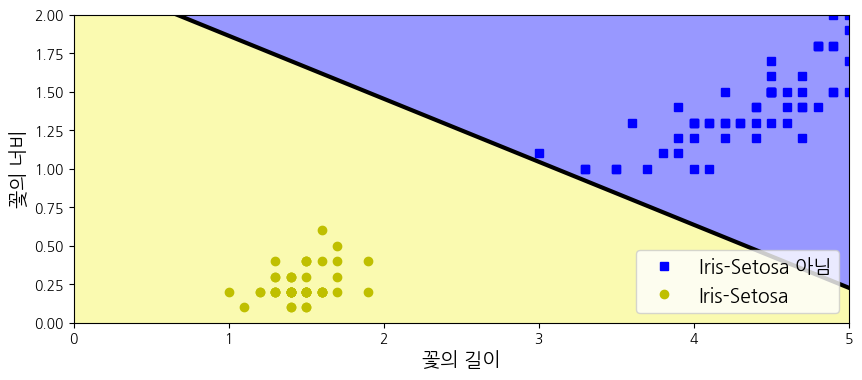

In [20]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib.colors import ListedColormap

axes = [0, 5, 0, 2]

plt.figure(figsize=(10,4))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label='Iris-Setosa 아님')
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label='Iris-Setosa')

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.xlabel("꽃의 길이", fontsize=14)
plt.ylabel("꽃의 너비", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)
plt.show()